In [51]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [26]:
fold = "nuselection"
tree = "NeutrinoSelectionFilter"

mc = uproot.open("root_files/mc_bnb.root")[fold][tree]
nue = uproot.open("root_files/nue.root")[fold][tree]
data = uproot.open("root_files/bnb.root")[fold][tree]
ext = uproot.open("root_files/ext.root")[fold][tree]
dirt = uproot.open("root_files/dirt.root")[fold][tree]

variables = [
    "shr_dedx_Y", "shr_bkt_pdg", "p", "pt", "selected", "nu_pdg", "shr_theta",
    "slpdg", "trkshr_score_v", "backtracked_pdg", "shr_theta_v",
    "shr_pfp_id_v", "category", "trk_theta_v", "trk_pfp_id", "shr_energy_tot",
    "trk_energy_tot", "shr_hits_tot", "ccnc", "shr_dedx_y_v", "trk_chipr",
    "trk_bkt_pdg", "trk_pid_chipr_v"
]

mc = mc.pandas.df(variables, flatten=False)
nue = nue.pandas.df(variables, flatten=False)
data = data.pandas.df(variables, flatten=False)
ext = ext.pandas.df(variables, flatten=False)
dirt = dirt.pandas.df(variables, flatten=False)

ext["shr_dedx_Y"] = ext["shr_dedx_Y"]*1.042
data["shr_dedx_Y"] = data["shr_dedx_Y"]*1.042
ext["shr_energy_tot"] = ext["shr_energy_tot"]*1.042
data["shr_energy_tot"] = data["shr_energy_tot"]*1.042

samples = {"mc": mc, "nue": nue, "data": data, "ext": ext, "dirt": dirt}

weights = {"mc": 0.080786, "nue": 0.00057768, "ext": 0.71702, "dirt": 0.299}

In [52]:
plotter = plotter.Plotter(samples, weights)

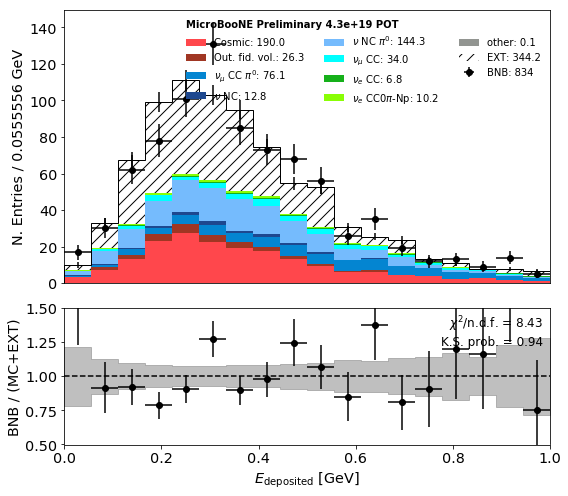

In [60]:
fig, ax1, ax2 = plotter.plot_variable(
    "pt",
    query="selected==1 & slpdg==12",
    title=r"$E_{\mathrm{deposited}}$ [GeV]",
    kind="event_category",
    bins=18,
    range=(0,1))